# A nonpardemic machine learning model
So far we’ve been dealing with Logistic Regression. In Logistic Regression, we look at the data graphically and draw a line to separate the data. The model is defined by the coefficients that define the line. These coefficients are called parameters. Since the model is defined by these parameters, Logistic Regression is a parametric machine learning algorithm.

In this module, we’ll introduce Decision Trees, which are an example of a **nonparametric** machine learning algorithm. Decision Trees won’t be defined by a list of parameters as we’ll see in the upcoming lessons.

# Tree Terminolgy 
Each of the rectangles is called a node. The nodes which have a feature to split on are called internal nodes. The very first internal node at the top is called the root node. The final nodes where we make the predictions of survived/didn’t survive are called leaf nodes. Internal nodes all have two nodes below them, which we call the node’s children.
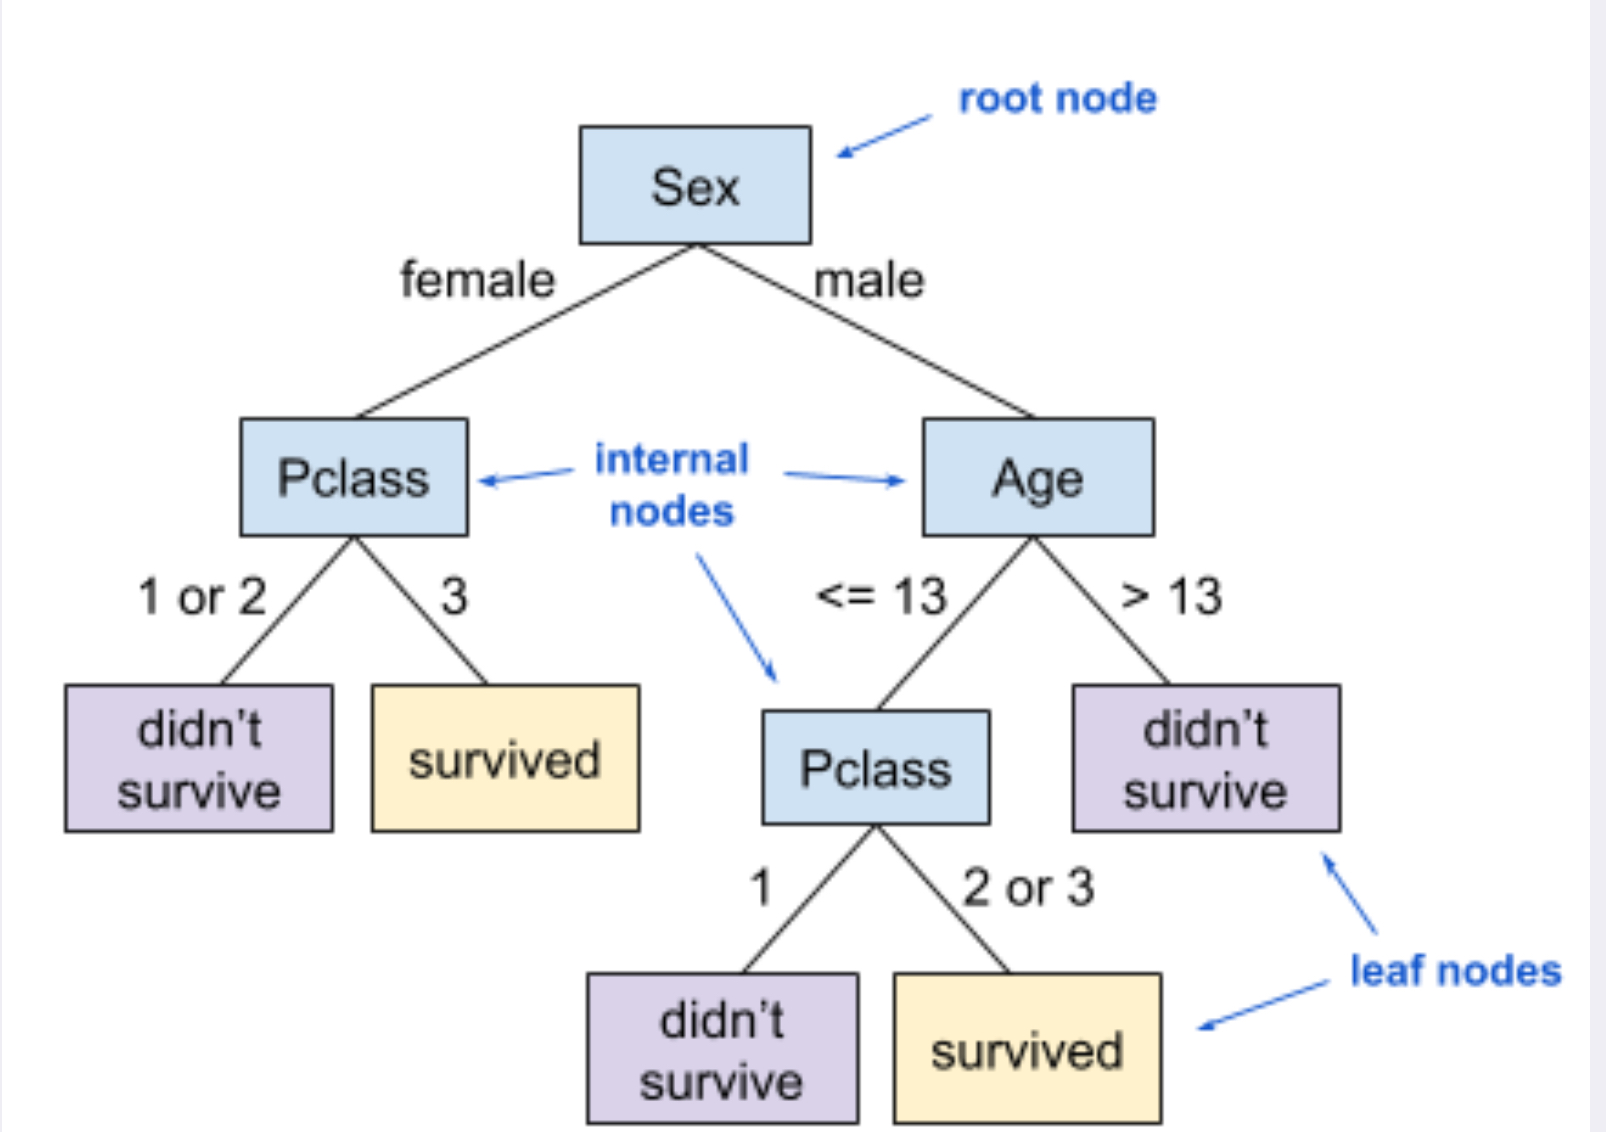

# How did we get the decision tree
When building the Decision Tree, we don’t just randomly choose which feature to split on first. We want to start by choosing the feature with the most predictive power. Let’s look at our same Decision Tree again.

# What makes a good split
The mathematical term we’ll be measuring is called **information gain**. This will be a value from 0 to 1 where 0 is the information gain of a useless split and 1 is the information gain of a perfect split. In the next couple parts we will define gini impurity and entropy which we will use to define information gain. First we will discuss the intuition of what makes a good split.

What we’re going for is **homogeneity** (or **purity**) on each side. Ideally we would send all the passengers who survived to one side and those who didn’t survive to the other side. We’ll look at two different mathematical measurements of purity. We’ll use the purity values to calculate the information gain.

# Gini Impurity
We calculate the gini impurity on a subset of our data based on how many datapoints in the set are passengers that survived and how many are passengers who didn’t survive. It will be a value between 0 and 0.5 where 0.5 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% in the same class).

The formula for gini is as follows. p is the percent of passengers who survived. Thus (1-p) is the percent of passengers who didn’t survive.

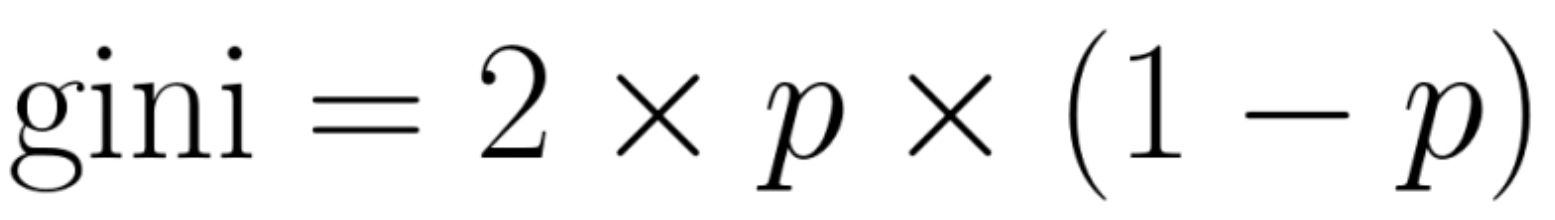




On the left, for the passengers with Age<=30, let’s first calculate the percent of passengers who survived:

Percent of passengers who survived = 197/(197+328) = 0.3752
Percent of passengers who didn’t survive = 1 - 0.375 = 0.6248

Now let’s use that to calculate the gini impurity:



```
2 * 0.3752 * 0.6248 = 0.4689
```
We can see that this value is close to 0.5, the maximum value for gini impurity. This means that the set is impure.

Now let’s calculate the gini impurity for the right side, passengers with Age>30.


```
2 * 145/(145+217) * 217/(145+217) = 0.4802
```

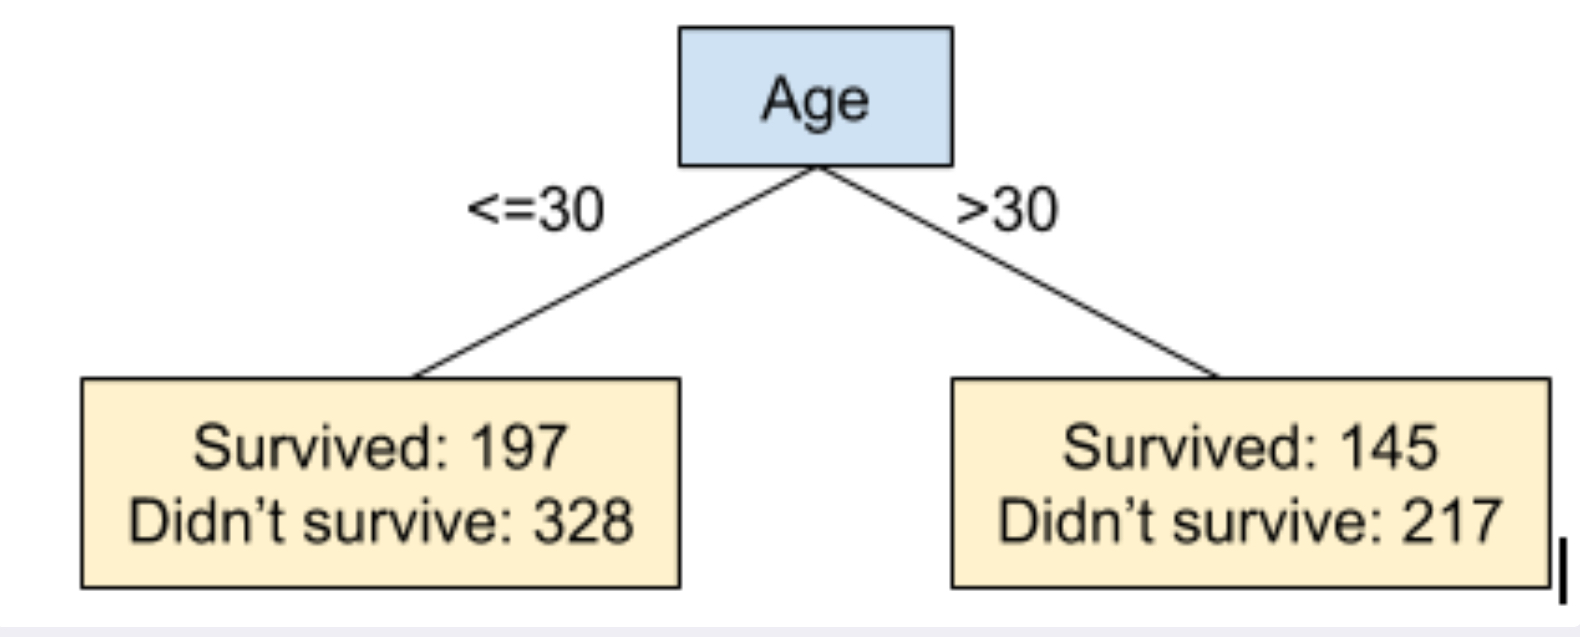


# Entropy
Entropy is another measure of purity. It will be a value between 0 and 1 where 1 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% the same class).

The formula for entropy comes from physics. p again is the percent of passengers who survived.
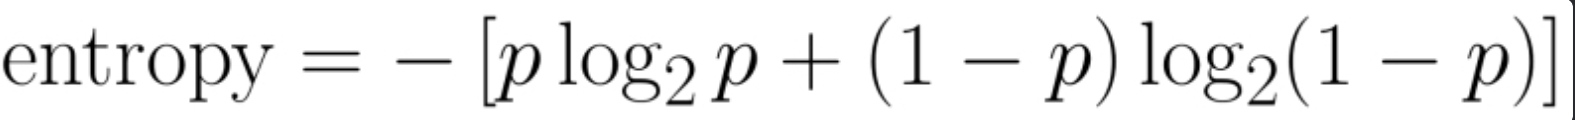

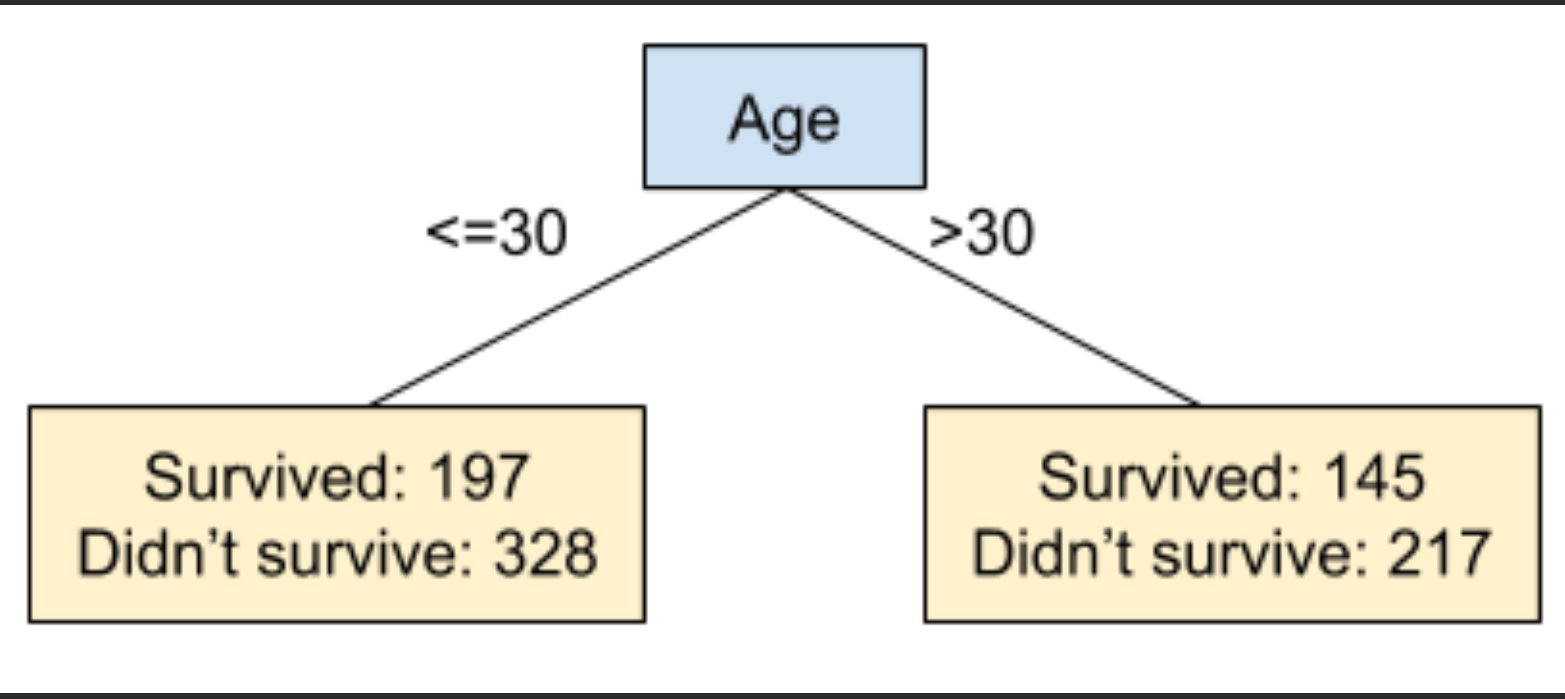



```
On the left (Age<=30):
p = 197/(197+328) = 0.3752
Entropy = -(0.375 * log(0.375) + (1-0.375) * log(1-0.375)) = 0.9546
```


```
And on the right (Age>30):
p = 145/(145+217) = 0.4006
Entropy =  -(0.401 * log(0.401) + (1-0.401) * log(1-0.401)) =  0.9713
```




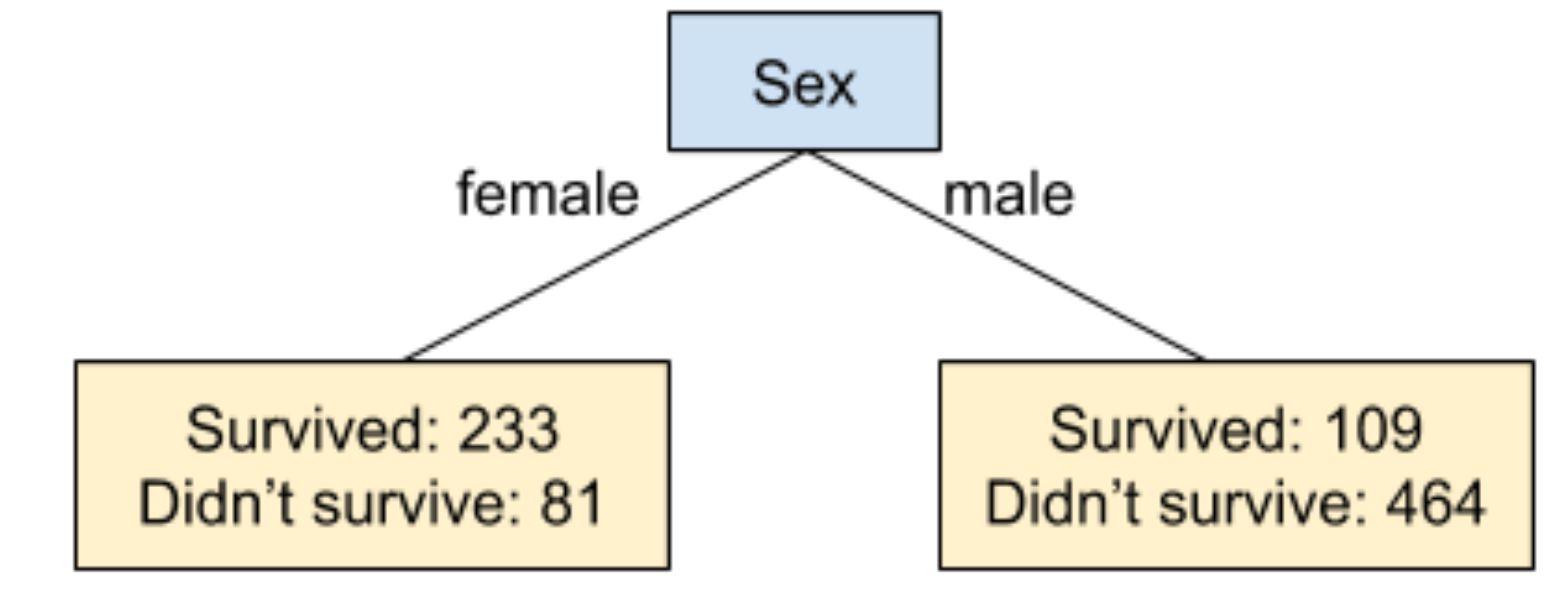



```
On the left (female):
p = 233/(233+81) = 0.7420
Entropy = -(p * log(p) + (1-p) * log(1-p)) = 0.8237
```


```
And on the right (male):
p = 109/(109+464) = 0.1902
Entropy =  -(p * log(p) + (1-p) * log(1-p)) = 0.7019
```




# Information Gain
Now that we have a way of calculating a numerical value for impurity, we can define information gain.

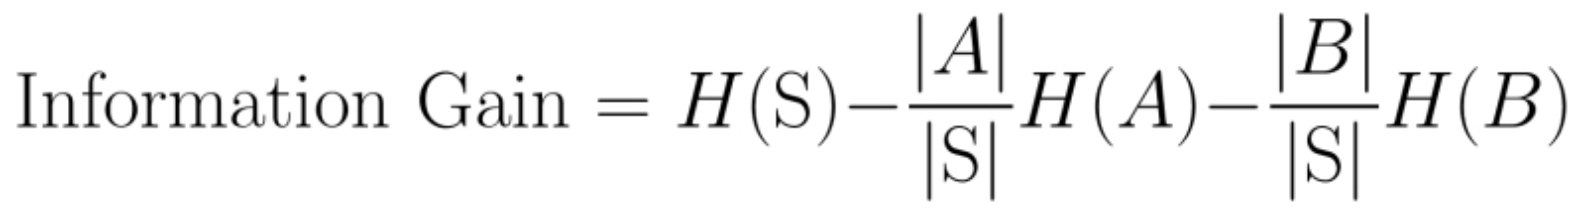



H is our impurity measure (either Gini impurity or entropy). S is the original dataset and A and B are the two sets we’re splitting the dataset S into. In the first example above, A is passengers with Age<=30 and B is passengers with Age>30. In the second example, A is female passengers and B is male passengers. |A| means the size of A. 

Let’s calculate this value for our two examples. Let’s use Gini impurity as our impurity measure.

We’ve already calculated most of the Gini impurity values, though we need to calculate the Gini impurity of the whole set. There are 342 passengers who survived and 545 passengers who didn’t survive, out of a total of 887 passengers, so the gini impurity is as follows:

```
Gini = 2 * 342/887 * 545/887 = 0.4738
```
Note that we have 197+328=525 passengers on the left (Age<=30) and 145+217=362 passengers on the right (Age>30). Thus, pulling in the gini impurity values that we calculated before, we get the following information gain:


```
Information gain = 0.4738 - 525/887 * 0.4689 - 362/887 * 0.4802 = 0.0003
```




# DecisionTreeClassifier
Just like with Logistic Regression, scikit-learn has a Decision Tree class. The code for building a Decision Tree model is very similar to building a Logistic Regression model. Scikit-learn did this intentionally so that it is easy to build and compare different models for the same dataset.
Heres's the import statement.


```
from sklearn.tree import DecisionTreeClassifier
```

Now we can apply the same methods that we used with the LogisticRegression class: fit (to train the model), score (to calculate the accuracy score) and predict (to make predictions).

We first create a DecisionTreeClassifier object.


```
model = DecisionTreeClassifier()
```

We do a train/test split using a random_state so that every time we run the code we will get the same split.


```
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
```
Then we use the fit method to train the model.


```
model.fit(X_train, y_train)
```
We can use the predict method to see what the model predicts. Here we can see the prediction for a male passenger in Pclass 3, who is 22 years old, has 1 sibling/spouse on board, has 0 parents/children on board, and paid a fare of 7.25.




In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.predict([[3, True, 22, 1, 0, 7.25]]))

[0]


# Scoring a Decision Tree Model
We can use the score and predict methods to get the accuracy, precision and recall scores.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True, random_state=10)
dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
for train_index, test_index in kf.split(X):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	dt = DecisionTreeClassifier()
	dt.fit(X_train, y_train)
	dt_accuracy_scores.append(dt.score(X_test, y_test))
	dt_y_pred = dt.predict(X_test)
	dt_precision_scores.append(precision_score(y_test, dt_y_pred))
 
	dt_recall_scores.append(recall_score(y_test, dt_y_pred))
	lr = LogisticRegression()
	lr.fit(X_train, y_train)
	lr_accuracy_scores.append(lr.score(X_test, y_test))
	lr_y_pred = lr.predict(X_test)
	lr_precision_scores.append(precision_score(y_test, lr_y_pred))
	lr_recall_scores.append(recall_score(y_test, lr_y_pred))
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))
print("Logistic Regression")
print("  accuracy:", np.mean(lr_accuracy_scores))
print("  precision:", np.mean(lr_precision_scores))
print("  recall:", np.mean(lr_recall_scores))

Decision Tree
  accuracy: 0.7756173427283692
  precision: 0.7091979593789295
  recall: 0.7089795008912656
Logistic Regression
  accuracy: 0.7970354853043865
  precision: 0.7618898922983288
  recall: 0.6900529617441382


# Gini vs Entropy
The default impurity **criterion** in scikit-learn’s Decision Tree algorithm is the Gini Impurity. However, they’ve also implemented entropy and you can choose which one you’d like to use when you create the DecisionTreeClassifier object.

If you go to the docs, you can see that one of the parameters is criterion.

To build a Decision Tree that uses entropy, we’ll need to set the criterion parameter to entropy. Here’s the code for building a Decision Tree that uses entropy instead of the Gini Impurity.



```
dt = DecisionTreeClassifer(criterion='entropy')
```

Now we can compare a Decision Tree using gini with a Decision Tree using entropy. We first create a k-fold split since when we’re comparing two models we want them to use the same train/test splits to be fair. Then we do a k-fold cross validation with each of the two possible models. We calculate accuracy, precision and recall for each of the two options.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
	print("Decision Tree - {}".format(criterion))
	accuracy = []
	precision = []
	recall = []
	for train_index, test_index in kf.split(X):
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]
		dt = DecisionTreeClassifier(criterion=criterion)
		dt.fit(X_train, y_train)
		y_pred = dt.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
		precision.append(precision_score(y_test, y_pred))
		recall.append(recall_score(y_test, y_pred))
	print("accuracy:", np.mean(accuracy))
	print("precision:", np.mean(precision))
	print("recall:", np.mean(recall), '\n')
	print()

Decision Tree - gini
accuracy: 0.7857677902621722
precision: 0.7236329629287646
recall: 0.7137561266442567 


Decision Tree - entropy
accuracy: 0.7722529042087222
precision: 0.7063353239979364
recall: 0.6921565289170923 




# Visualizing Decision Trees

If you want to create a png image of your graph, like the ones shown in this module, you can use scikit-learn's export_graphviz function.

First we import it

```
from sklearn.tree import export_graphviz
```

```
dot_file = export_graphviz(dt, feature_names=feature_names)
```

Then we use the export_graphviz function. Here dt is a Decision Tree object and feature_names is a list of the feature names. Graph objects are stored as .dot files which can be the GraphViz program. Our goal is to save a png image file. We will be able to convert the dot file to a png file, so we first save the dot file to a variable., so we save the dot file created by the export_graphviz function so that we can convert it to a png.

We can then use the graphviz module to convert it to a png image format.


```
import graphviz
graph = graphviz.Source(dot_file)
```

Finally, we can use the render method to create the file. We tell it the filename and file format. By default, it will create extra files that we are not interested in, so we add cleanup to tell it to get rid of them.


```
graph.render(filename='tree', format='png', cleanup=True)
```

Now you should have a file called tree.png on your computer. Here's the code for visualizing the tree for the Titanic dataset with just the Sex and Pclass features.

Now you should have a file called tree.png on your computer. Here's the code for visualizing the tree for the Titanic dataset with just the Sex and Pclass features.

```
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)
```

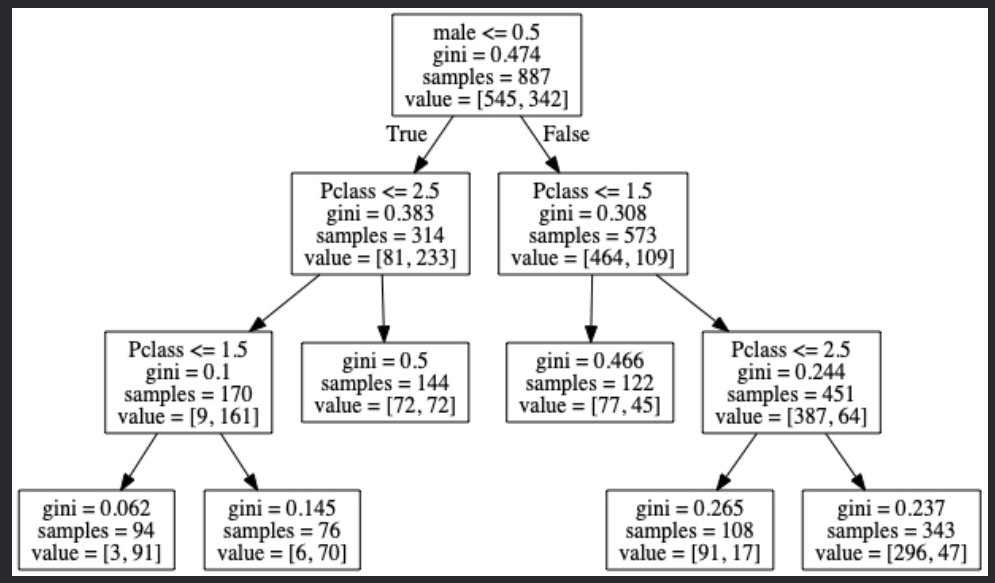
If you're going to run this on your computer, make sure to install graphviz first. You can do this with "pip install graphviz".


# Overfitting
Recall that overfitting is when we do a good job of building a model for the training set, but it doesn’t perform well on the test set. Decision Trees are incredibly prone to overfitting.
# Pruning
In order to solve these issues, we do what’s called pruning the tree. This means we make the tree smaller with the goal of reducing overfitting.

There are two types of pruning: pre-pruning & post-pruning. In pre-pruning, we have rules of when to stop building the tree, so we stop building before the tree is too big. In post-pruning we build the whole tree and then we review the tree and decide which leaves to remove to make the tree smaller.

# Grid Search
We’re not going to be able to intuit best values for the pre-pruning parameters. In order to decide on which to use, we use cross validation and compare metrics.  We could loop through our different options like we did in the Lesson on Decision Trees in Scikit-learn, but scikit-learn has a grid search class built in that will do this for us.

The class is called GridSearchCV. We start by importing it.


```
from sklearn.model_selection import GridSearchCV
```

GridSearchCV has four parameters that we’ll use:
1. The model (in this case a DecisionTreeClassifier)
2. Param grid: a dictionary of the parameters names and all the possible values
3. What metric to use (default is accuracy)
4. How many folds for k-fold cross validation

Let’s create the param grid variable. We’ll give a list of all the possible values for each parameter that we want to try.


```
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}
```

Now we create the grid search object. We’ll use the above parameter grid, set the scoring metric to the F1 score, and do a 5-fold cross validation.


```
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
```
Now we can fit the grid search object. This can take a little time to run as it’s trying every possible combination of the parameters.


```
gs.fit(X, y)
```

Since we have 3 possible values for max_depth, 2 for min_samples_leaf and 4 for max_leaf_nodes, we have 3 * 2 * 4 = 24 different combinations to try:

max_depth: 5, min_samples_leaf: 1, max_leaf_nodes: 10
max_depth: 15, min_samples_leaf: 1, max_leaf_nodes: 10
max_depth: 25, min_samples_leaf: 1, max_leaf_nodes: 10
max_depth: 5, min_samples_leaf: 3, max_leaf_nodes: 10
...

We use the best_params_ attribute to see which model won.


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

param_grid = {
	'max_depth': [5, 15, 25],
	'min_samples_leaf': [1, 3],
	'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}


Thus we see that the best model has a maximum depth of 15, maximum number of leaf nodes as 35 and minimum samples per leaf of 1.

The best_score_ attribute tells us the score of the winning model.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

param_grid = {
	'max_depth': [5, 15, 25],
	'min_samples_leaf': [1, 3],
	'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best score:", gs.best_score_)

best score: 0.7746390877915417
